# San Francisco Crime Analysis
This project is based on the San Francisco Crime Classfication dataset from [Kaggle](https://www.kaggle.com/kaggle/san-francisco-crime-classification)

The content includes:
- Dates - timestamp of the crime incident
- Category - category of the crime incident (only in train.csv).
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident
- X - Longitude
- Y - Latitude

In [19]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/train.csv')
df.head()

878049

In [3]:
#What is the district with the most crime?
res = df['PdDistrict'].value_counts()
res = res.reset_index()
res.columns = ['District','Crime Counts']
res

,District,Crime Counts
0,SOUTHERN,157182
1,MISSION,119908
2,NORTHERN,105296
3,BAYVIEW,89431
4,CENTRAL,85460
5,TENDERLOIN,81809
6,INGLESIDE,78845
7,TARAVAL,65596
8,PARK,49313
9,RICHMOND,45209


In [4]:
#district with the least crime
res.tail()

,District,Crime Counts
5,TENDERLOIN,81809
6,INGLESIDE,78845
7,TARAVAL,65596
8,PARK,49313
9,RICHMOND,45209


In [18]:
#most common crimes
res2 = df['Descript'].value_counts()
res2 = res2.reset_index()
res2.columns = ['Crime','Occurence']
res2 = res2.head(10)
res2

,Crime,Occurence
0,GRAND THEFT FROM LOCKED AUTO,60022
1,LOST PROPERTY,31729
2,BATTERY,27441
3,STOLEN AUTOMOBILE,26897
4,"DRIVERS LICENSE, SUSPENDED OR REVOKED",26839
5,WARRANT ARREST,23754
6,SUSPICIOUS OCCURRENCE,21891
7,"AIDED CASE, MENTAL DISTURBED",21497
8,PETTY THEFT FROM LOCKED AUTO,19771
9,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",17789


In [6]:
#day of week with most crime
res3 = df['DayOfWeek'].value_counts()
res3.head()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Name: DayOfWeek, dtype: int64

In [7]:
#convert dataframe dates into datetimes to count dates and time of day
def toDatetime(x):
    t = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return t
datelist = df['Dates'].apply(toDatetime)
years = []
months = []
time = []
for date in datelist:
    years.append(date.year)
    months.append(date.month)
    time.append(date.hour)
y = pd.DataFrame(Counter(years).items(), columns=['Year','Count'])
m = pd.DataFrame(Counter(months).items(), columns=['Month','Count'])
t = pd.DataFrame(Counter(time).items(), columns=['Hour','Count'])

# Which San Francisco district has the most crimes?
The bar chart below shows that the Southern district has significantly more crimes than the rest of the districts. Compared to the district with the second most crimes, there is a 31% increase of crimes in the Southern district. Southern has about 110,000 more crimes over the past 12 years than Richmond which has the least crimes. The Southern District is near the outskirts of downtown SF which is the most populated area in the city. On the other hand, Richmond has one of the lowest population density in the city which results in lesser crimes than the other districts. According to this chart, Richmond is the safest area and Southern is the most dangerous.

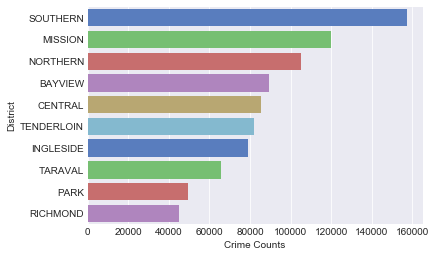

In [14]:
sns.set_style("darkgrid")
res_plot = sns.barplot(x=res['Crime Counts'], y=res['District'], palette = "muted")
plt.xticks(rotation=0)
plt.show()

# What is the most committed crime in the city? 
The chart below shows the top ten most committed crimes recorded in San Francisco. Aside from the grand theft from locked auto which is almost double the amount of the second most committed crime, the chart is fairly well distributed. From the second to the tenth place, there is about 13,000 more occurences. 

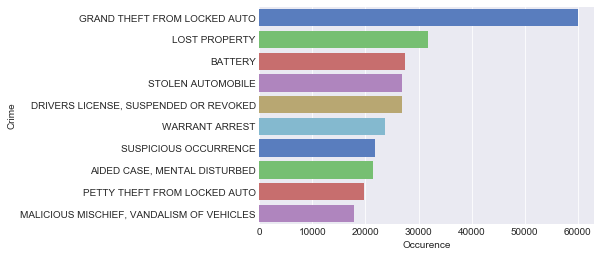

In [13]:
res2_plot = sns.barplot(x=res2['Occurence'], y=res2['Crime'], palette = "muted")
plt.xticks(rotation=0)
plt.show()

# Which year over the past 12 years had the most crimes? 
This data is recorded from 1/1/2003 to 5/13/2015 which explains why the year 2015 is an outlier; 2015 was only recorded for less than half a year so there's only 27,584 crimes recorded. This graph shows a steady decrease in crime rate from 2003 to 2007 and continues to decrease after 2008 until 2011. From 2011 to 2013, the ammount of crimes have been increase every year by about 5-7% which stopped by 2014. 

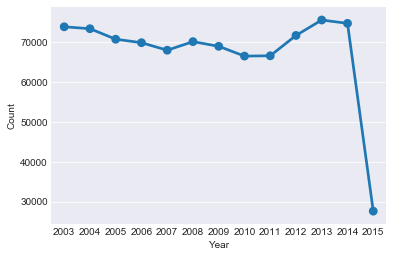

In [10]:
y_plot = sns.pointplot(x='Year',y='Count',data=y)
plt.show()


# When do most crimes happen throughout the year?
According to the dataset, there is a dip in crimes during June to September which illustrates that there are less crimes around summer time. Surprisingly, after the period of minimal crimes, October is the month with the highest crime rates which then the trend plummets to December, making it the month with the least crime at 65,006 compared to September's 80,274 crimes.

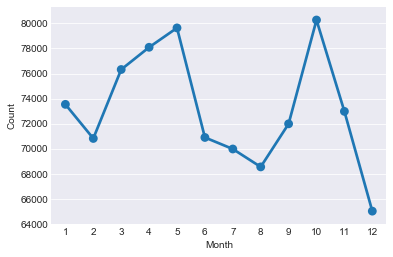

In [11]:
m_plot = sns.pointplot(x='Month',y='Count',data=m)
plt.show()

# When do most crimes happen during the day? 
The graph below shows the amount of crimes committed throughout every hour of the day from 2003 to 2015. This graph tells us that after midnight, there is a significant decrease in crimes which is reasonable because people tend to be indoors at that time. However, after 5AM which has the least amount of crimes at 8,637, there is a gradual increase of crimes until a spike of almost 52,000 crimes at 12PM. At 6PM, the crime rate peaks at 55,104 crimes during that hour and steadily decreases throughout the night. 

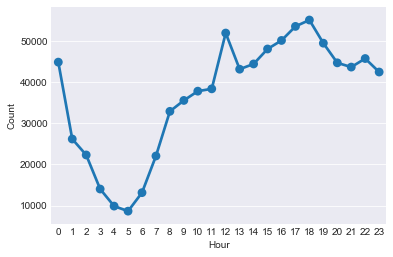

In [12]:
t_plot = sns.pointplot(x='Hour',y='Count',data=t)
plt.show()